### Pumpistor Theory

In [1]:
import matplotlib.cm as cm
import matplotlib.colors as col

In [2]:
from scipy.special import *
from math import *
import numpy as np  
from scipy.constants import *
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
font = {'weight' : 'normal', 'size' : 22}
plt.rc('font', **font)
labelsize=25

In [4]:
from cpw_resonator import cpw_resonator as cpw

In [5]:
phi_0 = codata.value('magn. flux quantum')

In [6]:
def my_range(start, end, step):
    while start <= end:
        yield start
        start += step

In [7]:
Ic = 2.0*10**(-6.)
Isum = 2.*Ic

In [8]:
f = np.pi*4.5*10**(-3)   #pump amplitude f = pi*Phi_AC/Phi_0

In [9]:
def I_Crit(F, Ic):
    return (2.*Ic)*abs(np.cos(np.pi*F))

#Josephson inductance (zero flux)
L_J0 = phi_0/(2.*np.pi*Isum)



#jv: Bessel function of the first kind of real order 'v'
def L_J(F):
    return L_J0/np.cos(np.pi*F)

def L_J_1storder(phi):
    return phi/(2.*jv(1.,phi))



In [10]:
#inductance "pumpistor"
def L_P(F,dTheta,f):
    return (2.*np.exp(-1.j*dTheta)*L_J0)/(f*np.tan(np.pi*F))

In [11]:
#SQUID inductance defined as two inductances in parallel
def L_SQ(F,dTheta,f):
    return 1./(1./L_P(F,dTheta,f)+1./L_J(F))

In [12]:
#impedance

def Z_SQ(F,dTheta,w,f):
    return 1.j*w*L_SQ(F,dTheta,f)


In [13]:
#reflection coefficient (SQUID):

def T_SQ(F,dTheta,w,f):
    return (Z_SQ(F,dTheta,w,f)-50.)/(Z_SQ(F,dTheta,w,f)+50.)

In [14]:
#scattering matrix capacitor

def SA11(w, Cc):
    return 1/(1.+1.j*2.*w*Cc*50.)

def SA21(w, Cc):
    return 1-SA11(w, Cc)

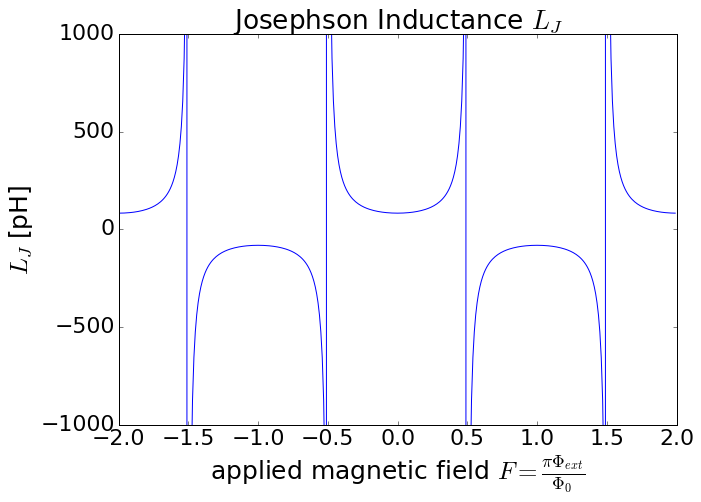

In [15]:

F2 = np.arange(-2,2,0.01)

        
color = ['red', 'green', 'blue', 'black', 'orange', 'brown']

fig, axes = plt.subplots( figsize = (10,7))
axes.plot(F2,L_J(F2)*10**(12.),'k', color = 'blue')
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$L_J$ [pH]', fontsize = labelsize)
axes.set_ylim(-1000,1000)
#axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_title(r'Josephson Inductance $L_J$')




In [16]:
print L_J(0.1)

8.65106253039e-11


In [17]:
dTheta1 = np.arange(-2.*np.pi,2.*np.pi,0.1)
F1 = 0.2
d1 = 0.1

In [18]:
np.min(np.absolute(L_P(F2,0.3,f).real))

2.1795546206096687e-23

C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


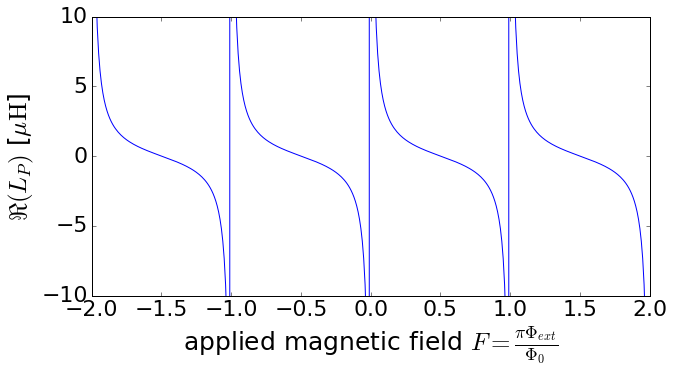

In [19]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, L_P(F2,0.,f).real*10**(8))  
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$\Re(L_P)$ [$\mathrm{\mu H}$]', fontsize = labelsize)
axes.set_ylim(-10,10)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axes.axhline(L_J0/f*10**6, ls = '-.', color = 'black')

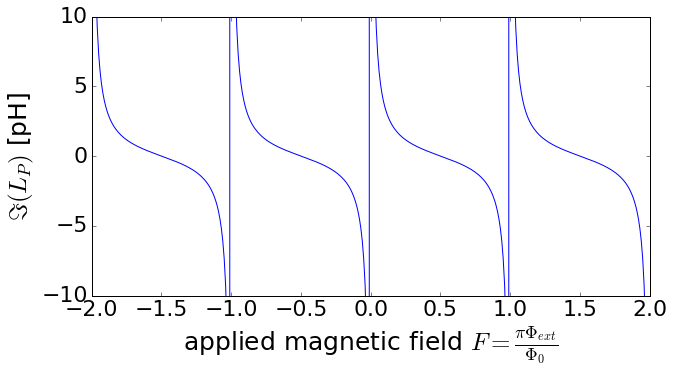

In [20]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, L_P(F2,-np.pi/2,f).imag*10**8. )
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$\Im(L_P)$ [pH]', fontsize = labelsize)
axes.set_ylim(-10,10)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

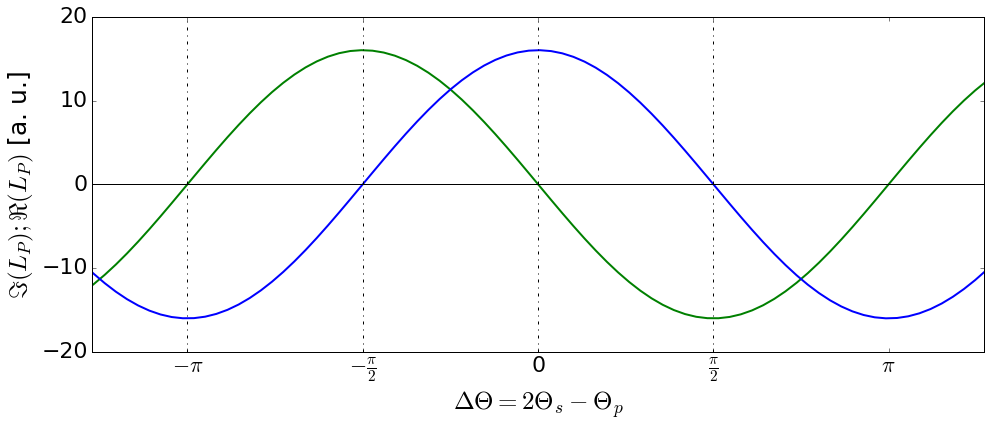

In [21]:
fig, axes = plt.subplots( figsize = (16,6))
axes.plot(dTheta1, L_P(F1,dTheta1,f).imag*10**9., color = 'green', lw = 2.)
axes.plot(dTheta1, L_P(F1,dTheta1,f).real*10**9., color = 'blue', lw = 2.)
axes.set_xlabel(r'$\Delta \Theta = 2 \Theta_s - \Theta_p$', fontsize = labelsize)
axes.set_ylabel(r'$\Im(L_P); \Re(L_P)$ [a. u.]', fontsize = labelsize)
axes.set_xlim(-4,4)
axes.axvline(-np.pi/2, color = 'black', ls = '-.')
axes.axvline(np.pi/2, color = 'black', ls = '-.')
axes.axvline(-np.pi, color = 'black', ls = '-.')
axes.axvline(0, color = 'black', ls = '-.')
axes.axhline(0, color = 'black')
axes.set_yticks([-20,-10,0,10,20])
#axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.setp(axes, xticks=[-np.pi, -(1./2.)*np.pi, 0 , 1./2*np.pi,  np.pi], xticklabels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$',r'$\pi$'])


In [23]:
#fig.savefig('L_P_real_and_imag.pdf', dpi = 200, bbox_inches = 'tight')

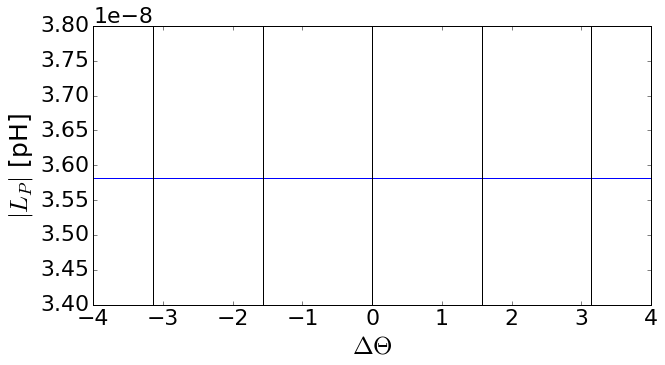

In [24]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(dTheta1, np.absolute(L_P(0.1,dTheta1,f)), color = 'blue')
axes.set_xlabel(r'$\Delta \Theta$', fontsize = labelsize)
axes.set_ylabel(r'$|L_P|$ [pH]', fontsize = labelsize)
axes.set_xlim(-4,4)
axes.axvline(-np.pi/2, color = 'black')
axes.axvline(np.pi/2, color = 'black')
axes.axvline(np.pi, color = 'black')
axes.axvline(-np.pi, color = 'black')
axes.axvline(0, color = 'black')
#axes.axhline(0, color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

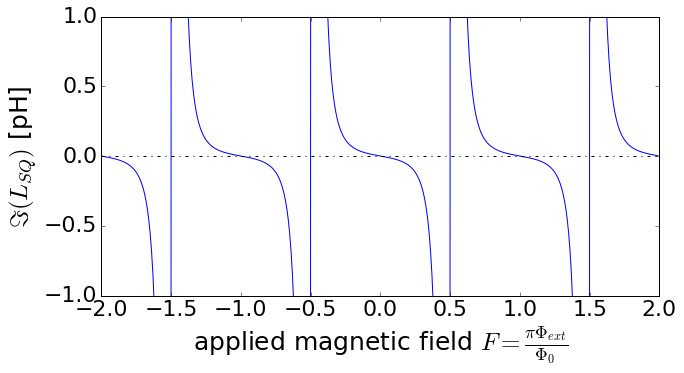

In [25]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, L_SQ(F2,np.pi/2,f).imag*10**11)
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$\Im(L_{SQ})$ [pH]', fontsize = labelsize)
axes.set_ylim(-1.,1.)
axes.axhline(0, ls = '-.', lw = 1., color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

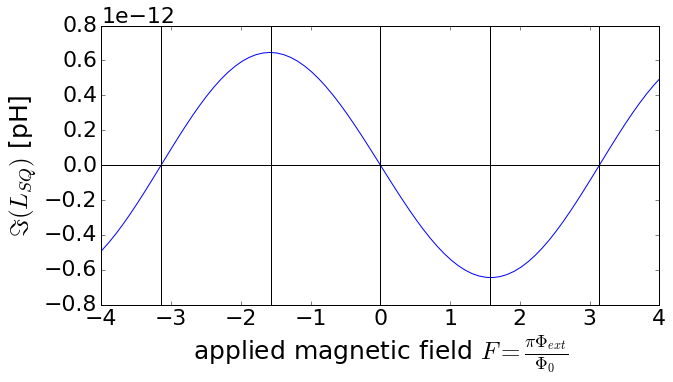

In [26]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(dTheta1, L_SQ(F1,dTheta1,f).imag, color = 'blue')
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$\Im(L_{SQ})$ [pH]', fontsize = labelsize)
axes.set_xlim(-4,4)
axes.axvline(-np.pi/2, color = 'black')
axes.axvline(np.pi/2, color = 'black')
axes.axvline(np.pi, color = 'black')
axes.axvline(-np.pi, color = 'black')
axes.axvline(0, color = 'black')
axes.axhline(0, color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

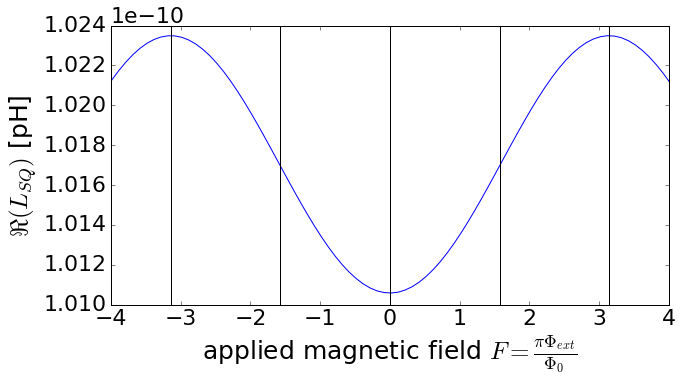

In [27]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(dTheta1, L_SQ(F1,dTheta1,f).real, color = 'blue')
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$\Re(L_{SQ})$ [pH]', fontsize = labelsize)
axes.set_xlim(-4,4)
axes.axvline(-np.pi/2, color = 'black')
axes.axvline(np.pi/2, color = 'black')
axes.axvline(np.pi, color = 'black')
axes.axvline(-np.pi, color = 'black')
axes.axvline(0, color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [28]:
1./L_J(0.1)

11559273748.013479

In [29]:
1./L_P(0.1,0.,f)

(27914679.934906412+0j)

In [30]:
print L_J(F1)
print L_P(F1,-np.pi/2.,f)

1.01699339441e-10
(9.80986884932e-25+1.60207316202e-08j)


In [31]:
#resonator:

w = 10e-6
g = 6e-6
l = 2700e-6      
Cc = 7.5*10**(-15)

res = cpw(w,g,l,Cc)

In [32]:
res.get_values()

Ll = 4.38459342705e-07 H/m
Cl = 1.63650727064e-10 F/m
distributed:
L = 1.1838402253e-09 H
C = 4.41856963074e-13 F
R = 0.247254977366 Ohm
lumped element:
Lr = 9.5958474297e-10 H
Cr = 2.20928481537e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 1203.22909907 
Q_load = 1191.04772122 

f_res = 10930816676.9 GHz
f_resc = 10749990099.7 GHz 


In [33]:
res._alpha

0.0024725497736586334

In [34]:
def gamma_l(w):
    return 1.j*w*res._beta + res._alpha*res._l

In [35]:
#power gain:

def gain(F,dTheta,w, Cc,f):
    return (np.absolute(SA11(w, Cc)+(SA21(w, Cc)**2.*T_SQ(F,dTheta,w,f)*np.exp((-2.*gamma_l(w))))/(1-SA11(w, Cc)*T_SQ(F,dTheta,w,f)*np.exp((-2.*gamma_l(w))))))**2.



# effective lumped circuit

In [36]:
def Leff(L,L_SQ):
    return 8.*L/(np.pi**2.+np.pi**4.*(L_SQ.real**2.-L_SQ.imag**2.)/(4.*(L)**2.))

In [37]:
def Ceff(C, L, L_SQ):
    return C/2.+C*L_SQ.real/L+np.pi**2.*C*((L_SQ.real)**2.-(L_SQ.imag)**2.)/(8.*L**2.)

In [38]:
def w0(Cc, Leff, Ceff):
    return 1./np.sqrt(Leff*(Cc+Ceff))

In [39]:
def Reff(L, L_SQ):
    return -2.*50.*(L)/(np.pi*L_SQ.imag)

In [40]:
def Qint(w0, Reff, Ceff, Cc):
    return Reff*(Ceff+Cc)*w0

In [41]:
def Qext(w0, Ceff, Cc):
    return (50.*w0*Cc**2.)**(-1.)*(Ceff+Cc)

In [42]:
w2 = 2.*np.pi*np.arange(1e10,1.1e10,1e6)

In [43]:
#w0(Cc, Leff1, Ceff1)/(2.*np.pi*10**9.)

In [44]:
Theta = 0

In [45]:
f1 = 0.0000000001

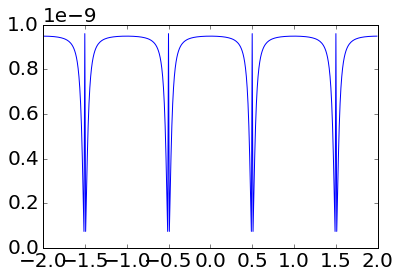

In [46]:
plt.plot(F2,Leff(res._L, L_SQ(F2, Theta,f1)))

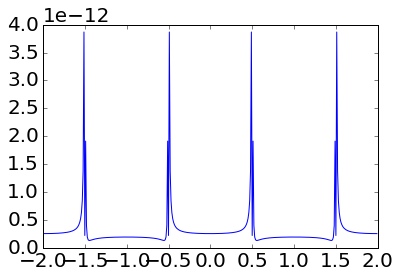

In [47]:
plt.plot(F2,Ceff(res._C,res._L, L_SQ(F2, Theta,f1)))

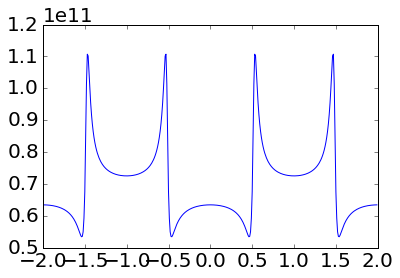

In [48]:
plt.plot(F2, w0(Cc, Leff(res._L, L_SQ(F2, Theta,f1)), Ceff(res._C, res._L, L_SQ(F2, Theta,f1))))

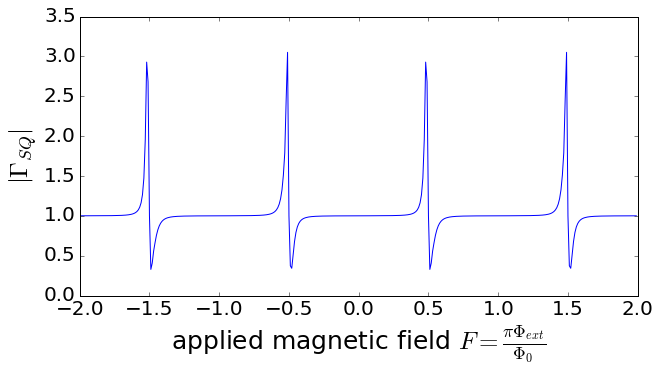

In [49]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, np.absolute(T_SQ(F2,-np.pi/2,w0(Cc, Leff(res._L, L_SQ(F2, -np.pi/2.,f)), Ceff(res._C, res._L, L_SQ(F2, -np.pi/2.,f))),f)))
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$|\Gamma_{SQ}|$', fontsize = labelsize)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

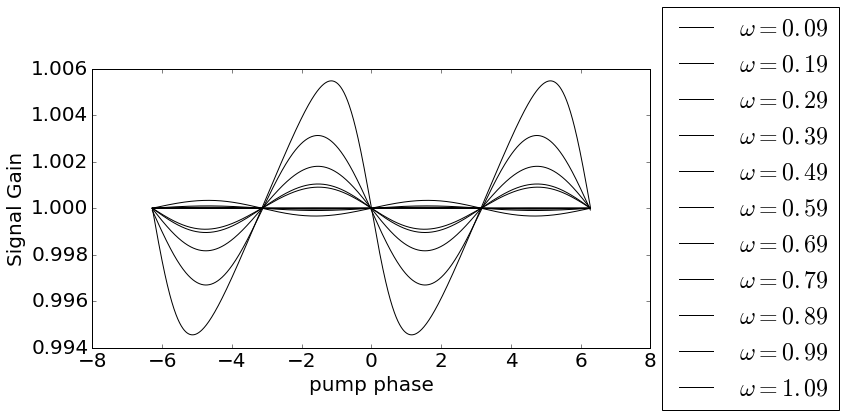

In [50]:
dTheta1 = np.arange(-2*np.pi,2.*np.pi,0.01)
F1 = 0.09
phi_s1 = 0.5
w1 = 2*np.pi*10.10*10.**9.

fig, axes = plt.subplots( figsize = (10,5))
for idx, dF in enumerate(my_range(0.0,1.0,0.1)):
    axes.plot(dTheta1,gain(F1+dF,dTheta1,w1, Cc,f),'k', label =r'$\omega = {}$'.format(str(F1+dF)))
axes.set_xlabel('pump phase')
axes.set_ylabel('Signal Gain')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axes.set_ylim(0.9,1.0)



 

In [51]:
omega = 2.*np.pi*np.linspace(7e9,11e9,1e6)

In [52]:
dTheta1 = np.arange(-2*np.pi,2.*np.pi,0.01)
F1 = 0.1

In [53]:
w01 = w0(1.1*Cc, Leff(res._L, L_SQ(0.1, -np.pi/2.,f)), Ceff(res._C, res._L, L_SQ(0.1, -np.pi/2.,f)))/(2.*np.pi)

In [54]:
print w01

10057912236.8


In [55]:
w01

10057912236.8041

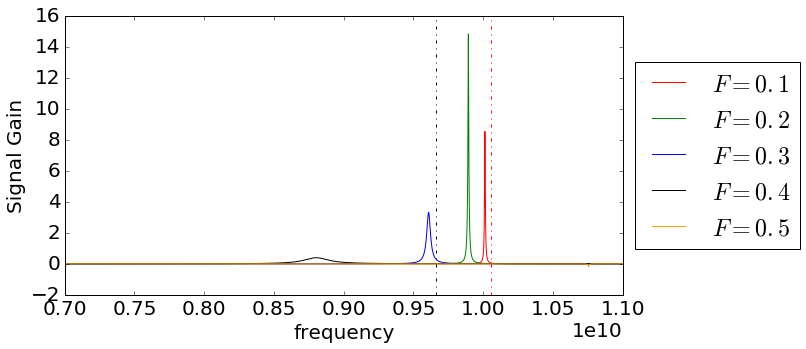

In [56]:
fig, axes = plt.subplots( figsize = (10,5))
for idx, dF in enumerate(my_range(0.0,0.4,0.1)):
    #w01 = w0(Cc, Leff(res._L, L_SQ(F1+dF, phi, -np.pi/2.)), Ceff(res._C, res._L, L_SQ(F1+dF, phi, -np.pi/2.)))
    axes.plot(omega/(2.*np.pi),10.*np.log10(gain(F1+dF,-np.pi/2.,omega, Cc,f)),'k', label =r'$F = {}$'.format(str(F1+dF)), color = color[idx])
axes.axvline(w01, color = 'red', ls = '-.')
axes.axvline(9.66e9, color = 'black', ls = '-.')
axes.set_xlabel('frequency')
axes.set_ylabel('Signal Gain')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axes.set_ylim(0.9,1.0)


In [57]:
omega1 = 2.*np.pi*np.linspace(9.*10**9.,11.*10**9., 3000)

In [58]:
omega_res = omega1[np.argmax(gain(0.1,-np.pi/2,omega1, Cc,f))]
print omega_res/(2.*np.pi)

10012337445.8


In [59]:
omega2 = np.linspace(omega_res-50e6, omega_res+50e6, 200)

In [60]:
F_sweep = np.arange(-0.5,0.5, 0.01)

In [61]:
X, Y = np.meshgrid(omega2, dTheta1)

X, Y = np.meshgrid(omega, dTheta1)

In [62]:
Z = gain(0.1,Y,X, Cc,f)

In [63]:
w01 = w0(Cc, Leff(res._L, L_SQ(0.1, -np.pi/2.,f)), Ceff(res._C, res._L, L_SQ(0.1, -np.pi/2.,f)))

In [64]:
w01/(2.*np.pi)

10072209014.872036

In [65]:
startcolor        =   'black'
midcolor          =   'blue'
endcolor          =   'white'
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor], N = 256, gamma = 1.0)
cm.register_cmap(cmap = c_cmap)

In [66]:
'''
fig, axes = plt.subplots(figsize=(15,7))
p = axes.pcolor(X,Y,10.*np.log10(Z), cmap = c_cmap)
cb = fig.colorbar(p, ax = axes)
axes.set_ylabel(r'$\Delta \Theta = 2\Theta_s  - \Theta_p$')
plt.setp(axes, yticks=[-2.*np.pi,-np.pi, -np.pi/2, 0., np.pi/2., np.pi, 2.*np.pi], yticklabels = [r'$-2\pi$',r'$-\pi}$',r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$', r'$\pi$', r'$2\pi$'])
#axes.set_xlabel(r'$F = \frac{\pi \Phi_{ext}}{\Phi_0}$')
axes.set_xlabel(r'$\omega_s [\mathrm{GHz}]$')
axes.axvline(omega_res, color = 'red', lw = 1.)'''

"\nfig, axes = plt.subplots(figsize=(15,7))\np = axes.pcolor(X,Y,10.*np.log10(Z), cmap = c_cmap)\ncb = fig.colorbar(p, ax = axes)\naxes.set_ylabel(r'$\\Delta \\Theta = 2\\Theta_s  - \\Theta_p$')\nplt.setp(axes, yticks=[-2.*np.pi,-np.pi, -np.pi/2, 0., np.pi/2., np.pi, 2.*np.pi], yticklabels = [r'$-2\\pi$',r'$-\\pi}$',r'$-\x0crac{\\pi}{2}$', '0',  r'$\x0crac{\\pi}{2}$', r'$\\pi$', r'$2\\pi$'])\n#axes.set_xlabel(r'$F = \x0crac{\\pi \\Phi_{ext}}{\\Phi_0}$')\naxes.set_xlabel(r'$\\omega_s [\\mathrm{GHz}]$')\naxes.axvline(omega_res, color = 'red', lw = 1.)"

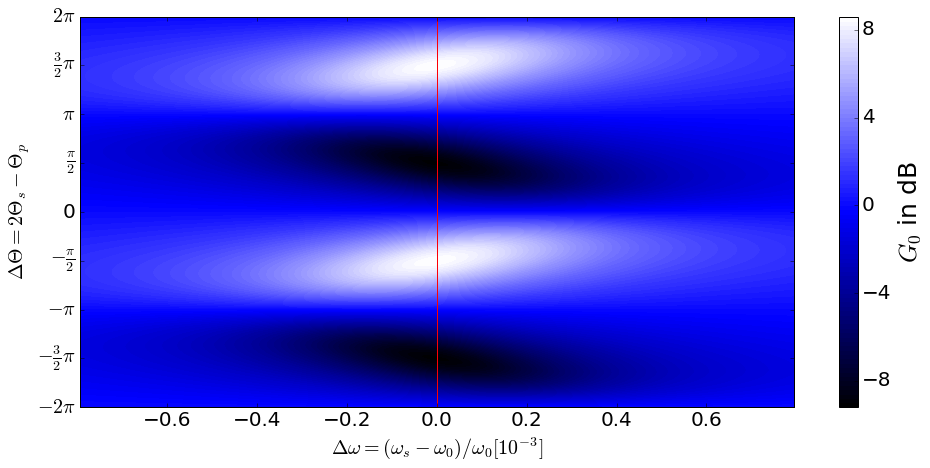

In [67]:
fig, axes = plt.subplots(figsize=(16,7))
p = axes.contourf((X-omega_res)/omega_res*10**3.,Y,10.*np.log10(Z), 100, cmap = c_cmap)
cb = fig.colorbar(p, ax = axes)
axes.set_ylabel(r'$\Delta \Theta = 2\Theta_s  - \Theta_p$')
plt.setp(axes, yticks=[-2.*np.pi,-3*np.pi/2,-np.pi, -np.pi/2, 0., np.pi/2., np.pi,3*np.pi/2., 2.*np.pi], yticklabels = [r'$-2\pi$', r'$-\frac{3}{2}\pi$', r'$-\pi}$',r'$-\frac{\pi}{2}$', '0',  r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3}{2}\pi$', r'$2\pi$'])
#axes.set_xlabel(r'$F = \frac{\pi \Phi_{ext}}{\Phi_0}$')
axes.set_xlabel(r'$\Delta \omega = (\omega_s-\omega_0)/\omega_0 [10^{-3}]$')
axes.axvline(0, color = 'red', lw = 1.)
cb.set_ticks([-8,-4,0,4,8])
cb.set_label('$G_0$ in dB', fontsize = labelsize)

In [68]:
fig.savefig('Gain.png', dpi = 400, bbox_inches = 'tight')
#fig.savefig('Gain.pdf', dpi = 200, bbox_inches = 'tight')

In [69]:
omega_2 = np.linspace(omega_res-50e6, omega_res+50e6, 2000)

In [70]:
omega_res = omega_2[np.argmax(gain(0.1,-np.pi/2,omega_2, Cc,f))]
print omega_res

62909196442.5


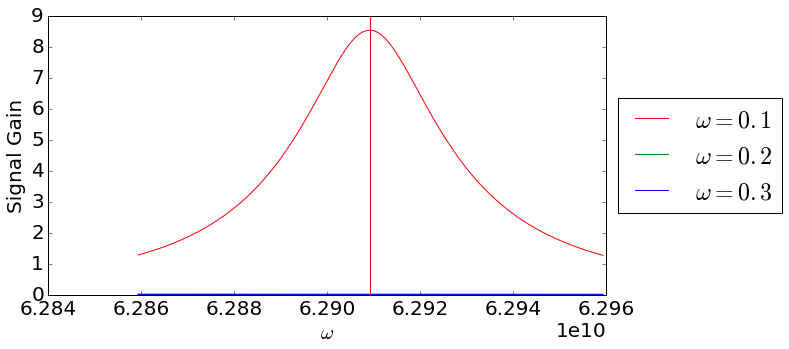

In [71]:
fig, axes = plt.subplots( figsize = (10,5))
for idx, dF in enumerate(my_range(0.0,0.3,0.1)):
    axes.plot(omega_2,10.*np.log10(gain(0.1+dF,-np.pi/2,omega_2, Cc,f)),'k', label =r'$\omega = {}$'.format(str(0.1+dF)), color = color[idx])
axes.set_xlabel(r'$\omega$')
axes.axvline(omega_res, color = 'red')
#axes.axvline(2.*np.pi*w01, color = 'red')
axes.set_ylabel('Signal Gain')
#axes.set_xlim(58.6e9,58.8e9)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axes.set_ylim(0.9,1.0)



 

In [72]:
f

0.01413716694115407

In [73]:
dTheta = np.linspace(-2,2,2000)

phi_s = 0.5omega_s = 62.9091964425 GHz$


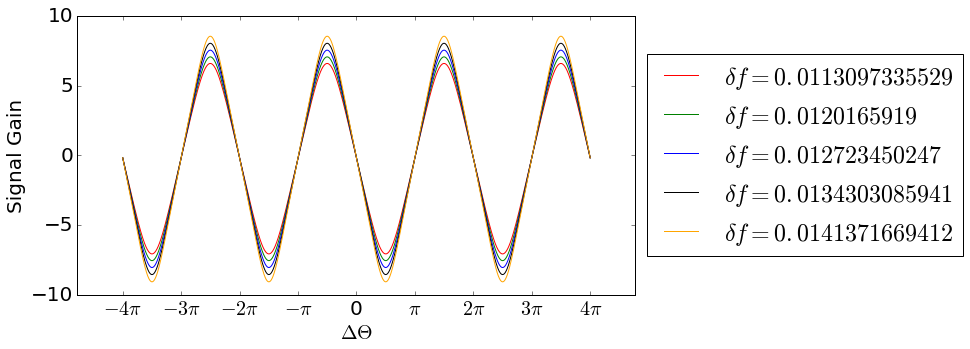

In [74]:
fig, axes = plt.subplots( figsize = (10,5))
for idx, df in enumerate(my_range(0.8,1.05,0.05)):
    axes.plot(2*np.pi*dTheta,10.*np.log10(gain(0.1,2*np.pi*dTheta,omega_res, Cc,df*f)),'k', label =r'$\delta f = {}$'.format(str(df*f)), color = color[idx])
axes.set_xlabel(r'$\Delta \Theta$')
#axes.axvline(2.*np.pi*omega_res, color = 'red')
axes.set_ylabel('Signal Gain')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axes.set_ylim(0.9,1.0)
print 'phi_s = {}omega_s = {} GHz$'.format(str(phi_s1), str(omega_res/10**9.))
plt.setp(axes, xticks=[-4.*np.pi, -3.*np.pi, -2.*np.pi, -1.*np.pi, 0., 1.*np.pi, 2.*np.pi,  3.*np.pi,  4.*np.pi], xticklabels = [r'$-4\pi$',r'$-3\pi$',r'$-2\pi$', r'$-\pi$', '0',  r'$\pi$',r'$2\pi$',r'$3\pi$', r'$4\pi$'])

#r'$\phi_s = {}\,\,\omega_s = {}$'.format(str(phi_s1), str(omega_res))

phi_s = 0.5omega_s = 62.9091964425 GHz$


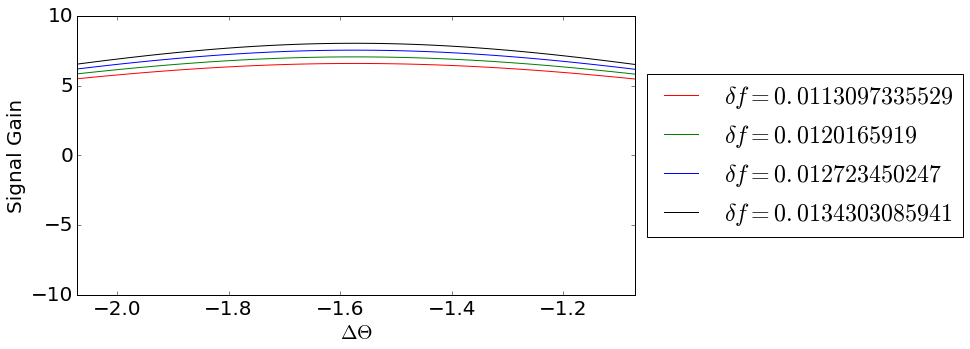

In [75]:
fig, axes = plt.subplots( figsize = (10,5))
for idx, df in enumerate(my_range(0.8,1.0,0.05)):
    axes.plot(2*np.pi*dTheta,10.*np.log10(gain(0.1,2*np.pi*dTheta,omega_res, Cc,df*f)),'k', label =r'$\delta f = {}$'.format(str(df*f)), color = color[idx])
axes.set_xlabel(r'$\Delta \Theta$')
#axes.axvline(2.*np.pi*omega_res, color = 'red')
axes.set_ylabel('Signal Gain')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes.set_xlim(-np.pi/2.-0.5,-np.pi/2+0.5)
print 'phi_s = {}omega_s = {} GHz$'.format(str(phi_s1), str(omega_res/10**9.))

#r'$\phi_s = {}\,\,\omega_s = {}$'.format(str(phi_s1), str(omega_res))

# varying pump strength:

In [76]:
f1 = np.pi*np.arange(1.0*10**(-4),8*10**(-3),1.0*10**(-5))

In [77]:
f2 = np.pi*np.arange(1.0*10**(-3),8*10**(-3),1.0*10**(-5))

In [78]:
dTheta2 = np.arange(-np.pi,0, 1e-2)

In [79]:
X1, Y1 = np.meshgrid(f2, dTheta2)

In [80]:
Z1 = gain(0.1, Y1, omega_res, Cc, X1)

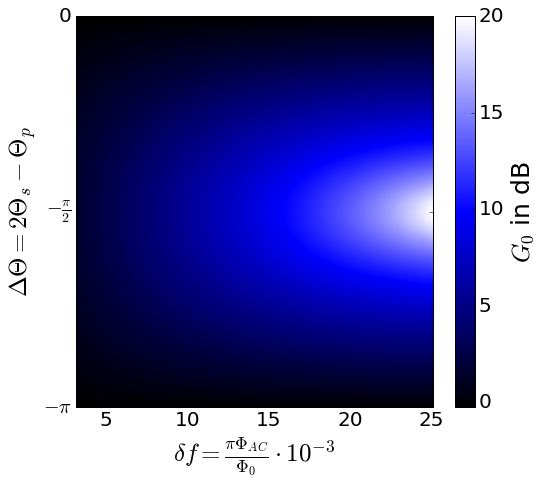

In [81]:

fig, axes = plt.subplots(figsize=(8,7))
p = axes.contourf(X1*1e3,Y1,10.*np.log10(Z1),300, cmap = c_cmap)
cb = fig.colorbar(p, ax = axes)
axes.set_ylabel(r'$\Delta \Theta = 2\Theta_s  - \Theta_p$', fontsize = labelsize)
plt.setp(axes, yticks=[-np.pi, -np.pi/2, 0], yticklabels = [r'$-\pi}$',r'$-\frac{\pi}{2}$', '0'])
#axes.set_xlabel(r'$F = \frac{\pi \Phi_{ext}}{\Phi_0}$')
axes.set_xlabel(r'$\delta f = \frac{\pi\Phi_{AC}}{\Phi_0} \cdot 10^{-3} $', fontsize = labelsize)
cb.set_label('$G_0$ in dB', fontsize = labelsize)
cb.set_ticks([0,5,10,15,20])
#axes.set_xticks([])

In [119]:
fig.savefig('Gain_df.pdf', dpi = 200, bbox_inches = 'tight')

# varying pump strength and applied dc field

In [141]:
startcolor2        =   'black'
midcolor2          =   'white'
endcolor2          =   'blue'
c_cmap2 = col.LinearSegmentedColormap.from_list('olive',[startcolor2,midcolor2,endcolor2], N = 256, gamma = 1.0)
cm.register_cmap(cmap = c_cmap2)

In [134]:
F = np.linspace(-0.5,0.5,500)

In [135]:
omega_F = np.linspace(50e9,65e9,1000)

In [146]:
X_F, Y_w = np.meshgrid(F, omega_F)

In [147]:
Z_fF = gain(X_F, -np.pi/2, Y_w, Cc, 0.5*f)

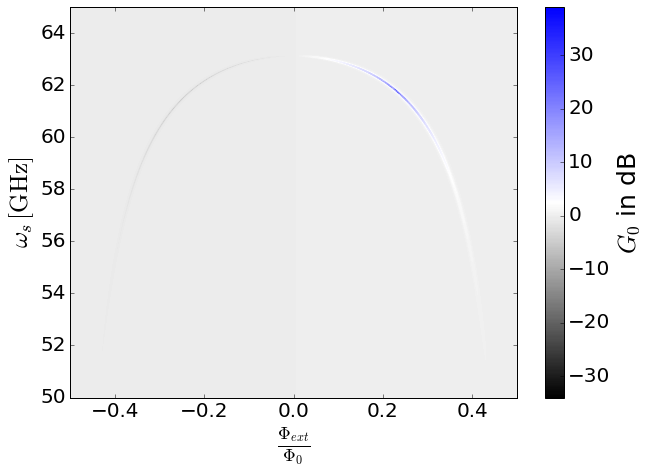

In [172]:
fig, axes = plt.subplots(figsize=(10,7))
p = axes.contourf(X_w,Y_F/1e9,10.*np.log10(Z_fF), 300, cmap = c_cmap2, v_min = -30, v_max = 30)
cb = fig.colorbar(p, ax = axes)
axes.set_xlabel(r'$\frac{\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
#axes.set_xlabel(r'$F = \frac{\pi \Phi_{ext}}{\Phi_0}$')
axes.set_ylabel(r'$\omega_s\,[\mathrm{GHz}]$', fontsize = labelsize)
cb.set_label('$G_0$ in dB', fontsize = labelsize)
cb.set_ticks([-30,-20,-10,0,10,20,30,40])

# pump strength $delta f$ over frequency $omega_s$

In [89]:
omega_f = omega2

In [90]:
X_f, Y_w = np.meshgrid(f2, omega_f)

In [91]:
Z_fw = gain(0.1, -np.pi/2, Y_w, Cc, X_f)

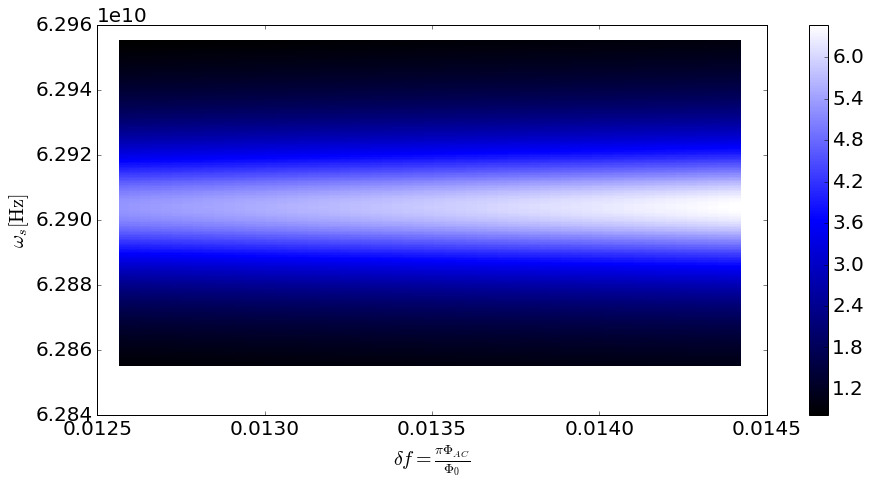

In [92]:
fig, axes = plt.subplots(figsize=(15,7))
p = axes.pcolor(X_f,Y_w,10.*np.log10(Z_fw), cmap = c_cmap)
cb = fig.colorbar(p, ax = axes)
axes.set_ylabel(r'$\omega_s [\mathrm{Hz}]$')
#axes.set_xlabel(r'$F = \frac{\pi \Phi_{ext}}{\Phi_0}$')
axes.set_xlabel(r'$\delta f = \frac{\pi\Phi_{AC}}{\Phi_0} $')

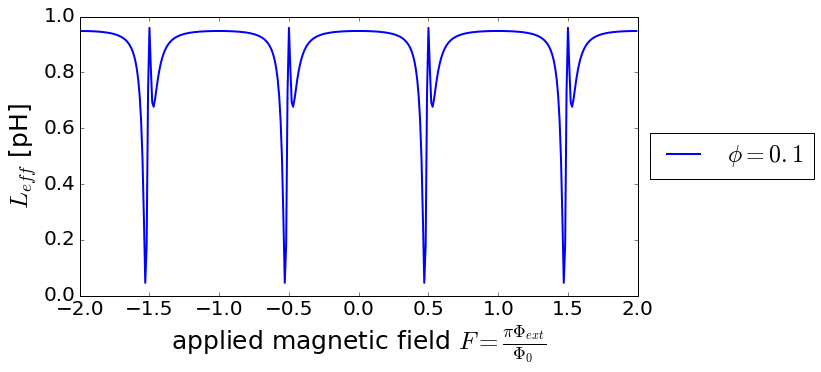

In [93]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, Leff(res._L, L_SQ(F2, 0.1, 0.1,f))*10**9., label =r'$\phi = {}$ '.format(str(0.1)), lw = 2.)
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$L_{eff}$ [pH]', fontsize = labelsize)
axes.set_ylim(0,1)
axes.axhline(0, ls = '-.', lw = 1., color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

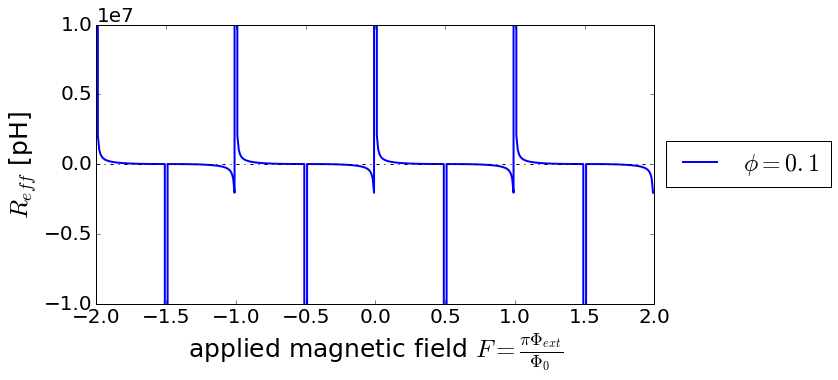

In [101]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, Reff( res._L, L_SQ(F2, 0.1, np.pi/2.,f)), label =r'$\phi = {}$ '.format(str(0.1)), lw = 2.)
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$R_{eff}$ [pH]', fontsize = labelsize)
axes.axhline(0, ls = '-.', lw = 1., color = 'black')
axes.set_ylim(-10000000,10000000)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [104]:
w01 = w0(Cc, Leff(res._L, L_SQ(F2, 0.1, 0.1,f)), Ceff(res._C, res._L, L_SQ(F2, 0.1, 0.1,f)) )
Reff01 = Reff( res._L, L_SQ(F2, 0.1, 0.1,f))
Ceff01 = Ceff(res._C, res._L, L_SQ(F2, 0.1, 0.1,f))

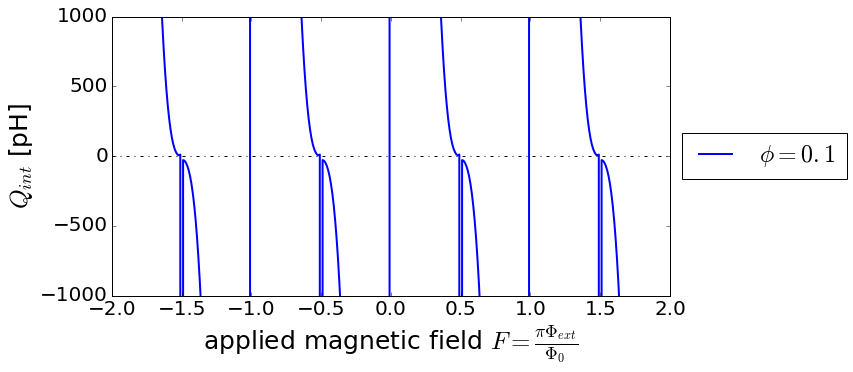

In [105]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(F2, Qint( w01, Reff01, Ceff01, Cc), label =r'$\phi = {}$ '.format(str(0.1)), lw = 2.)
axes.set_xlabel(r'applied magnetic field $F = \frac{\pi\Phi_{ext}}{\Phi_0}$', fontsize = labelsize)
axes.set_ylabel(r'$Q_{int}$ [pH]', fontsize = labelsize)
axes.axhline(0, ls = '-.', lw = 1., color = 'black')
axes.set_ylim(-1000,1000)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [111]:
w02 = w0(Cc, Leff(res._L, L_SQ(F, phi_s, dTheta1,f)), Ceff(res._C, res._L, L_SQ(F, phi_s, dTheta1,f)) )
Reff02 = Reff( res._L, L_SQ(F, phi_s, dTheta1,f))
Ceff02 = Ceff(res._C, res._L, L_SQ(F, phi_s, dTheta1,f))

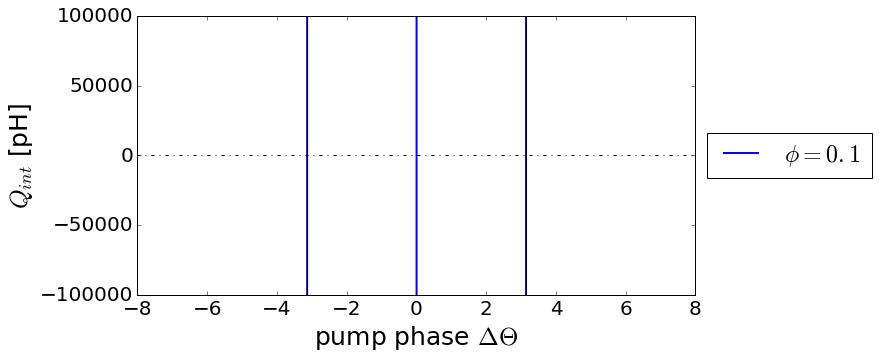

In [112]:
fig, axes = plt.subplots( figsize = (10,5))
axes.plot(dTheta1, Qint( w02, Reff02, Ceff02, Cc), label =r'$\phi = {}$ '.format(str(0.1)), lw = 2.)
axes.set_xlabel(r'pump phase $\Delta \Theta$', fontsize = labelsize)
axes.set_ylabel(r'$Q_{int}$ [pH]', fontsize = labelsize)
axes.axhline(0, ls = '-.', lw = 1., color = 'black')
axes.set_ylim(-100000, 100000)
axes.axvline(np.pi, color = 'black')
axes.axvline(-np.pi, color = 'black')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))